## Random Forest

In [2]:
import numpy as np
import pandas as pd 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

This imports the libraries we need. 

In [16]:
pre = pd.read_csv('../assets/combined_pre_classed.csv', index_col=0)
post = pd.read_csv('../assets/combined_post_classed.csv', index_col=0)

This imports the data. 

In [17]:
df = pd.concat([pre, post], ignore_index=True) 
df.shape

(98550, 2)

In [18]:
target = df['disaster']

In [19]:
stopwords_additional = ['rt', 'twitter', 'com', 'net', 'carr', 'irma', 'harvey',
                        'maria', 'carrfire', 'camp', 'campfire', 'woolsey',
                        'woolseyfire', 'prague', 'north', 'northbay', 'news',
                        'hurricaneirma', 'hurricaneharvey', 'hurricanemaria',
                        'headline', 'breaking']
stopwords_complete = text.ENGLISH_STOP_WORDS.union(stopwords_additional)

This sets the stopwords we need. 

In [20]:
tfidf = TfidfVectorizer(stop_words=stopwords_complete, min_df=5, max_df=.95)

In [21]:
term_mat = tfidf.fit_transform(df['text'])

This tfidfs the document corpus. 

In [22]:
term_df = pd.SparseDataFrame(term_mat, columns=tfidf.get_feature_names())

This creates a sparse dataframe of the feature names. 

In [45]:
term_df.fillna(0, inplace=True)

This replaces all null values with 0. 

In [ ]:
SVD = TruncatedSVD(n_components=100)
svd_matrix = SVD.fit_transform(term_df)

In [ ]:
component_names = ["component_"+str(i+1) for i in range(100)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=component_names)

The above performs SVD on our sparse dataframe of feature names and then converts the resulting matrix to dataframe form. 

In [26]:
pipe_params_tfidf_rf = {
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [2,3,4]
}

In [27]:
rf = RandomForestClassifier()

This initializes a random forest classification model. 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(svd_df,
                                                    target,
                                                    stratify=target)

This creates a train test split of our SVD dataframe while stratifying the data along whether or not it is disaster related. 

In [29]:
gs = GridSearchCV(RandomForestClassifier(n_estimators=100), 
                  param_grid=pipe_params_tfidf_rf, 
                  return_train_score=True,
                  cv=3)
gs.fit(X_train, y_train)
gs.score(X_train, y_train) 

0.9992829310531443

This gridsearches using random forest classification and threefold crossvalidation to find the optimal hyperparameters for the random forest model. 

In [30]:
gs.score(X_test, y_test)

0.937616689666369

Our train and test scores are 0.99 and 0.94 respectively. 

Text(0, 0.5, 'Feature')

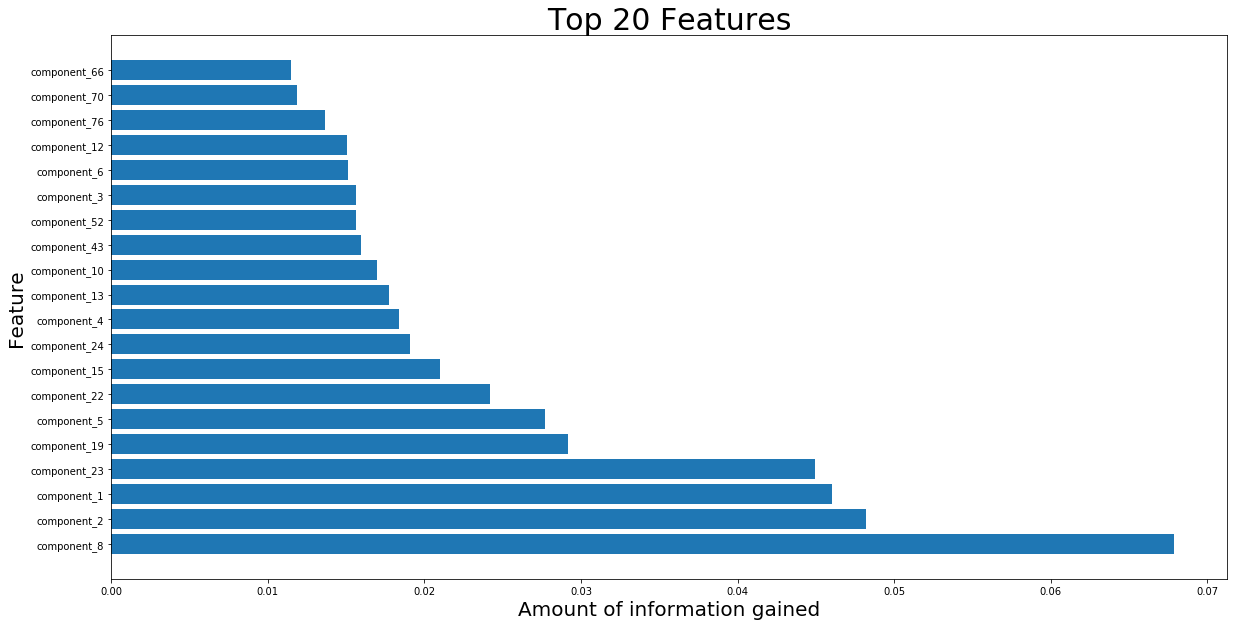

In [36]:
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(20)
plt.barh(temp.index, temp['importance'])
plt.title('Top 20 Features', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=20)
plt.ylabel('Feature', fontsize=20)

This is a graph of the top 20 features. 